<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Missing_Persons_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and data**👨‍💻

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import mplcyberpunk
import plotly.graph_objects as go
import requests
plt.style.use('cyberpunk')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/desaparecidos.csv',on_bad_lines='skip')
data.head(6)

<ipython-input-4-91972e84a0e3>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/desaparecidos.csv',on_bad_lines='skip')


ID Estado de la desaparición Clasificación de la desaparición  \
0   1              Desaparecido                  Sin Información   
1   2              Desaparecido                  Sin Información   
2   3              Desaparecido                  Sin Información   
3   4           Aparecio Muerto                  Sin Información   
4   5             Aparecio Vivo                  Sin Información   
5   6           Aparecio Muerto                  Sin Información   

  Fecha de la desaparición Edad al momento de la desaparición  \
0  2006-12-29T00:00:00.000                                 21   
1  2006-12-26T00:00:00.000                                 24   
2  2006-12-29T00:00:00.000                                 13   
3  2006-12-31T00:00:00.000                                 50   
4  2006-12-29T00:00:00.000                                 17   
5  2006-12-31T00:00:00.000                                 41   

  Sexo del desaparecido País de nacimiento del desaparecido  \
0                Hombre                     Sin información   
1                Hombre                            Colombia   
2                 Mujer                            Colombia   
3                Hombre                            Colombia   
4                 Mujer                     Sin información   
5                 Mujer                            Colombia   

  Ancestro racial del desaparecido Estado civil del desaparecido  \
0                          Mestizo                   Soltero (a)   
1                          Mestizo                   Soltero (a)   
2                          Mestizo                   Soltero (a)   
3                           Blanco                   Soltero (a)   
4                          Mestizo                   Soltero (a)   
5                          Mestizo                   Unión Libre   

                    Escolaridad del desaparecido  \
0  Educación básica secundaria o secundaria baja   
1  Educación básica secundaria o secundaria baja   
2  Educación básica secundaria o secundaria baja   
3                      Educación básica primaria   
4    Educación técnica profesional y tecnológica   
5              Educación media o secundaria alta   

              Pertenencia grupal del desaparecido  \
0  Persona adicta a una droga natural o sintética   
1  Persona adicta a una droga natural o sintética   
2                                         Ninguno   
3  Persona adicta a una droga natural o sintética   
4                                         Ninguno   
5  Persona adicta a una droga natural o sintética   

  País donde ocurre la desaparición  \
0                   Sin información   
1                          Colombia   
2                          Colombia   
3                   Sin información   
4                          Colombia   
5                   Sin información   

  Municipio donde ocurre la desaparición DANE  \
0                             Sin información   
1                                 Bogotá D.C.   
2                                 Bogotá D.C.   
3                             Sin información   
4                                 Bogotá D.C.   
5                             Sin información   

  Departamento donde ocurre la desaparición DANE      Contexto  
0                                Sin información  Desaparición  
1                                     Bogotá D.C  Desaparición  
2                                     Bogotá D.C  Desaparición  
3                                Sin información  Desaparición  
4                                     Bogotá D.C  Desaparición  
5                                Sin información  Desaparición

# **Explore and clean data**🧹💨

In [5]:
data.shape

(197436, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197436 entries, 0 to 197435
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   ID                                              197436 non-null  int64 
 1   Estado de la desaparición                       197436 non-null  object
 2   Clasificación de la desaparición                197436 non-null  object
 3   Fecha de la desaparición                        197436 non-null  object
 4   Edad al momento de la desaparición              197436 non-null  object
 5   Sexo del desaparecido                           197436 non-null  object
 6   País de nacimiento del desaparecido             197436 non-null  object
 7   Ancestro racial del desaparecido                197436 non-null  object
 8   Estado civil del desaparecido                   197436 non-null  object
 9   Escolaridad del desaparecido         

In [7]:
data.isnull().sum()

ID                                                0
Estado de la desaparición                         0
Clasificación de la desaparición                  0
Fecha de la desaparición                          0
Edad al momento de la desaparición                0
Sexo del desaparecido                             0
País de nacimiento del desaparecido               0
Ancestro racial del desaparecido                  0
Estado civil del desaparecido                     0
Escolaridad del desaparecido                      0
Pertenencia grupal del desaparecido               0
País donde ocurre la desaparición                 0
Municipio donde ocurre la desaparición DANE       0
Departamento donde ocurre la desaparición DANE    0
Contexto                                          0
dtype: int64

In [8]:
data['Fecha de la desaparición'] = pd.to_datetime(data['Fecha de la desaparición'], errors='coerce')

In [9]:
data['Edad al momento de la desaparición'] = data['Edad al momento de la desaparición'].apply(lambda x:x==0 if x==f"Sin información" else x)

In [10]:
data['Edad al momento de la desaparición'] = data['Edad al momento de la desaparición'].astype(float)

In [11]:
data['Departamento donde ocurre la desaparición DANE'].unique()

array(['Sin información', 'Bogotá D.C', 'Valle Del Cauca', 'Atlántico',
       'Cundinamarca', 'Tolima', 'Santander', 'Meta', 'Sin Información',
       'Boyacá', 'Antioquia', 'Risaralda', 'Huila', 'Norte De Santander',
       'Cesar', 'Quindio', 'Bolívar', 'Casanare', 'Cauca', 'Caquetá',
       'Nariño', 'Caldas', 'Chocó', 'Magdalena', 'Arauca', 'Guaviare',
       'La Guajira', 'Desaparecidos en el extranjero', 'Córdoba', 'Sucre',
       'Vichada', 'Putumayo', 'Amazonas', 'Guainía',
       'San Andres Y Providencia', 'Vaupés'], dtype=object)

In [12]:
data['Departamento donde ocurre la desaparición DANE'] = data['Departamento donde ocurre la desaparición DANE'].map(
                                                              {'Antioquia':'ANTIOQUIA','Atlántico':'ATLANTICO','Bogotá, D.C.':'SANTAFE DE BOGOTA D.C',
                                                               'Bolívar':'BOLIVAR','Boyacá':'BOYACA','Caldas':'CALDAS','Caquetá':'CAQUETA','Cauca':'CAUCA','Cesar':'CESAR',
                                                               'Córdoba':'CORDOBA','Cundinamarca':'CUNDINAMARCA','Chocó':'CHOCO','Huila':'HUILA','La Guajira':'LA GUAJIRA',
                                                               'Magdalena':'MAGDALENA','Meta':'META','Nariño':'NARIÑO','Norte de Santander':'NORTE DE SANTANDER','Quindio':'QUINDIO',
                                                               'Risaralda':'RISARALDA','Santander':'SANTANDER','Sucre':'SUCRE','Tolima':'TOLIMA','Valle Del Cauca':'VALLE DEL CAUCA',
                                                               'Arauca':'ARAUCA','Casanare':'CASANARE','Putumayo':'PUTUMAYO',
                                                               'San Andres Y Providencia':'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA',
                                                               'Amazonas':'AMAZONAS','Guainía':'GUAINIA','Guaviare':'GUAVIARE','Vaupés':'VAUPES','Vichada':'VICHADA',
                                                               'Desaparecidos en el extranjero':'Extranjero','Sin Información':'Sin información','Sin información':'Sin información',
                                                               'nan':'Sin información'
                                                               })

In [13]:
data['Departamento donde ocurre la desaparición DANE'].unique()

array(['Sin información', nan, 'VALLE DEL CAUCA', 'ATLANTICO',
       'CUNDINAMARCA', 'TOLIMA', 'SANTANDER', 'META', 'BOYACA',
       'ANTIOQUIA', 'RISARALDA', 'HUILA', 'CESAR', 'QUINDIO', 'BOLIVAR',
       'CASANARE', 'CAUCA', 'CAQUETA', 'NARIÑO', 'CALDAS', 'CHOCO',
       'MAGDALENA', 'ARAUCA', 'GUAVIARE', 'LA GUAJIRA', 'Extranjero',
       'CORDOBA', 'SUCRE', 'VICHADA', 'PUTUMAYO', 'AMAZONAS', 'GUAINIA',
       'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA',
       'VAUPES'], dtype=object)

In [14]:
data['año'] = data['Fecha de la desaparición'].dt.strftime('%Y')

In [15]:
print(data['Fecha de la desaparición'].min().year, '\n',data['Fecha de la desaparición'].max().year)

1921 
 2023


In [34]:
data.groupby(['País donde ocurre la desaparición'])['ID'].count()

País donde ocurre la desaparición
Alemania                     4
Argentina                    1
Aruba                        4
Bahamas                      1
Bolivia                     10
Brasil                      19
Canadá                       1
Chile                       19
China                        3
Colombia                144655
Costa Rica                   4
Cuba                         2
Curaçao                      1
Ecuador                    189
España                      13
Estados Unidos              23
Francia                      4
Guatemala                    2
Honduras                     8
Italia                       5
México                     104
Panamá                      36
Paraguay                     1
Países Bajos                 1
Perú                        45
Puerto Rico                  1
Reino Unido                  2
República Dominicana         4
Sin información          51941
Turquía                      1
Uruguay                      2
Venez

In [21]:
data['cuenta'] = data['Departamento donde ocurre la desaparición DANE'].map({
      'Sin información':0, 'nan':0, 'ATLANTICO':2442, 'CUNDINAMARCA':5481, 'TOLIMA':3447,
       'SANTANDER':2699, 'META':6778, 'BOYACA':2132, 'ANTIOQUIA':18182, 'RISARALDA':4594, 'HUILA':2569,
       'CESAR':2089, 'QUINDIO':1714, 'BOLIVAR':1663, 'CASANARE':1295, 'CAUCA':2089, 'CAQUETA':2303,
       'NARIÑO':4000, 'CALDAS':4057, 'CHOCO':1587, 'MAGDALENA':3055, 'ARAUCA':2297, 'GUAVIARE':2309,
       'LA GUAJIRA':550, 'Extranjero':0, 'CORDOBA':1561, 'SUCRE':655, 'VICHADA':463,
       'PUTUMAYO':2243, 'AMAZONAS':105, 'GUAINIA':99,
       'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA':32,
       'VALLE DEL CAUCA':12123,'VAUPES':114})

In [22]:
data['lat'] = data['Departamento donde ocurre la desaparición DANE'].map({
      'Sin información':'Sin información', 'nan':'Sin información', 'ATLANTICO':10.96854, 'CUNDINAMARCA':4.60971, 'TOLIMA':4.43889,
       'SANTANDER':7.12539, 'META':4.142, 'BOYACA':5.45444, 'ANTIOQUIA':6.55, 'RISARALDA':5.16549, 'HUILA':2.9273,
       'CESAR':9.3333415, 'QUINDIO':4.53389, 'BOLIVAR': 5.85, 'CASANARE':5.5000085, 'CAUCA':2.43823, 'CAQUETA':1.61438,
       'NARIÑO':1.21361, 'CALDAS':6.1, 'CHOCO':5.69188, 'MAGDALENA':10.5808075, 'ARAUCA':7.08471, 'GUAVIARE':2.57286,
       'LA GUAJIRA':11.54444, 'Extranjero':'Sin información', 'CORDOBA':8.75, 'SUCRE':8.81136, 'VICHADA':6.18493,
       'PUTUMAYO':0.5000086, 'AMAZONAS':-1.0197136, 'GUAINIA':3.867,
       'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA':12.58317,
       'VALLE DEL CAUCA':3.42158,'VAUPES':1.25509})

In [23]:
data['lon'] =data['Departamento donde ocurre la desaparición DANE'].map({
      'Sin información':'Sin información', 'nan':'Sin información', 'ATLANTICO':-74.78132, 'CUNDINAMARCA':-74.08175, 'TOLIMA':-75.23222,
       'SANTANDER':-73.1198, 'META':-73.62664, 'BOYACA':-73.3617, 'ANTIOQUIA':-75.817, 'RISARALDA':-75.7668, 'HUILA':-75.28189,
       'CESAR':-73.5000086, 'QUINDIO': -75.68111, 'BOLIVAR': -76.017, 'CASANARE':-71.5000086, 'CAUCA':-76.61316, 'CAQUETA':-75.60623,
       'NARIÑO':-77.28111, 'CALDAS':-75.633, 'CHOCO':-76.65835, 'MAGDALENA':-74.0685669, 'ARAUCA':-70.75908, 'GUAVIARE':-72.64591,
       'LA GUAJIRA':-72.90722, 'Extranjero':'Sin información', 'CORDOBA':-75.883, 'SUCRE': -74.72084, 'VICHADA':-67.4894,
       'PUTUMAYO': -76.0000086, 'AMAZONAS':-71.9383333, 'GUAINIA':-67.917,
       'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA':-81.70636,
       'VALLE DEL CAUCA': -76.5205,'VAUPES':-70.235})

# **Charts, plots and insights**📊📈

Text(0, 0.5, 'Cantidad')

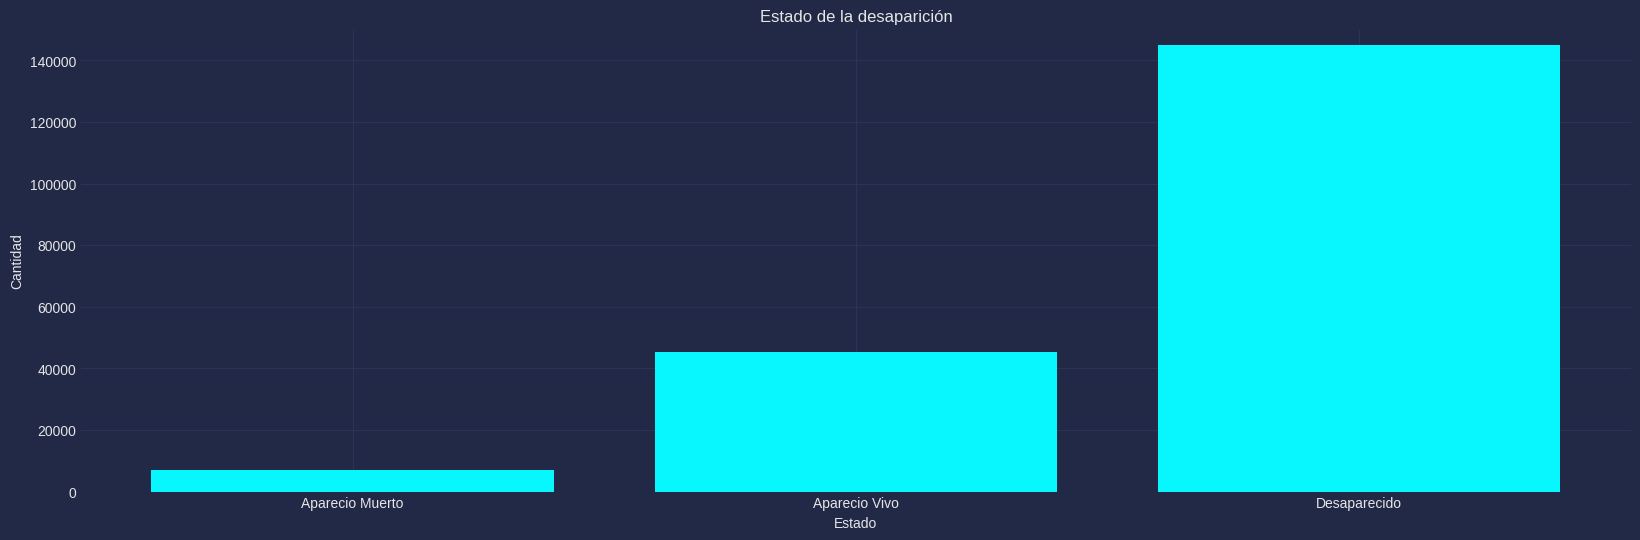

In [24]:
g = data.groupby(['Estado de la desaparición'])['ID'].count()
plt.figure(figsize=(20,6))
plt.bar(x=g.index, height=g.values)
plt.title('Estado de la desaparición')
plt.ylim(0,150000)
plt.xlabel('Estado')
plt.ylabel('Cantidad')


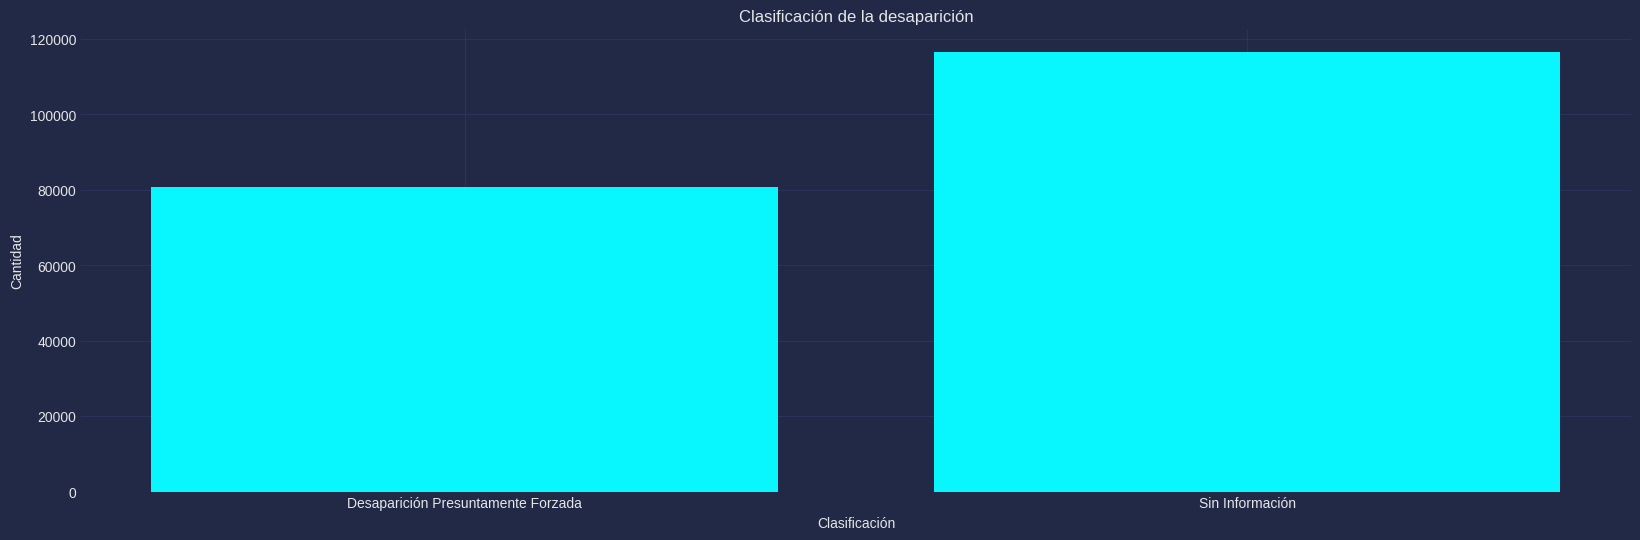

In [25]:
a = data.groupby(['Clasificación de la desaparición'])['ID'].count()
plt.figure(figsize=(20,6))
plt.bar(x=a.index,height=a.values)
plt.title('Clasificación de la desaparición')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')
mplcyberpunk.add_glow_effects()

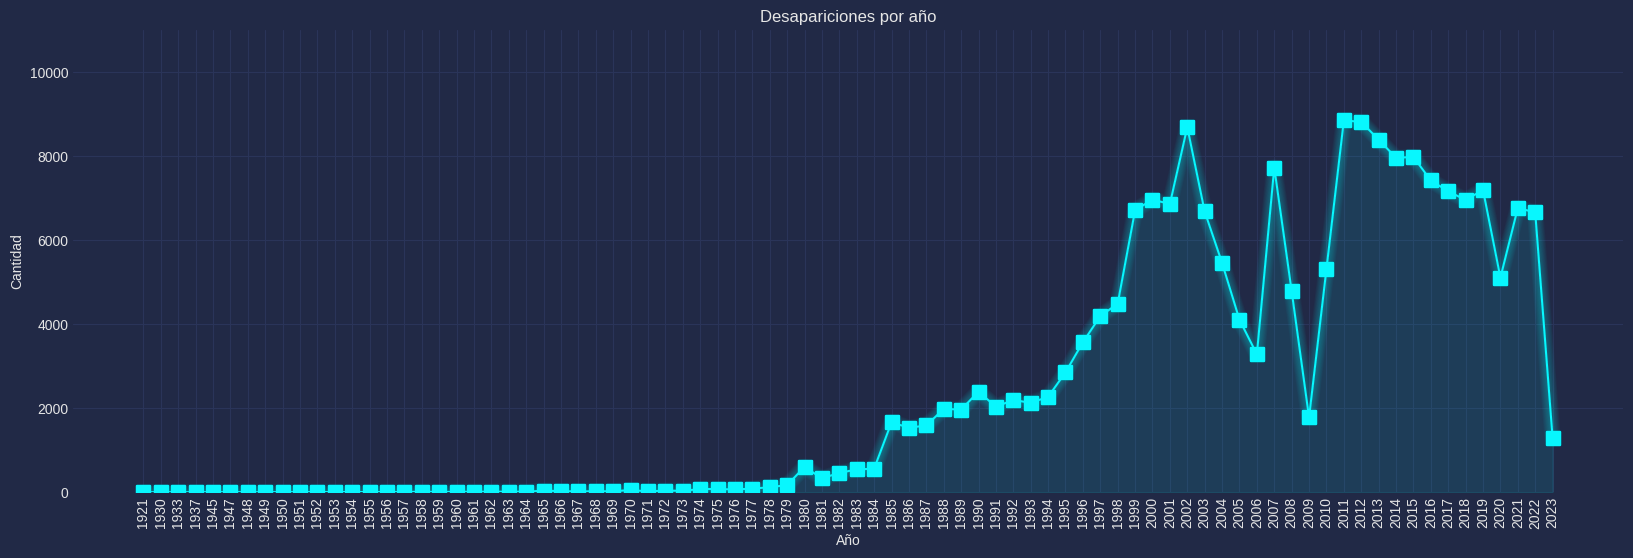

In [26]:
f=data.groupby(['año'])['ID'].count()
plt.figure(figsize=(20,6))
plt.plot(f.index, f.values,marker='s',ms=10 )
plt.title('Desapariciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.ylim(0,11000)
plt.xticks(rotation='vertical')
mplcyberpunk.add_glow_effects()

<ipython-input-27-841f933d79b0>:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Cuenta','Edades')


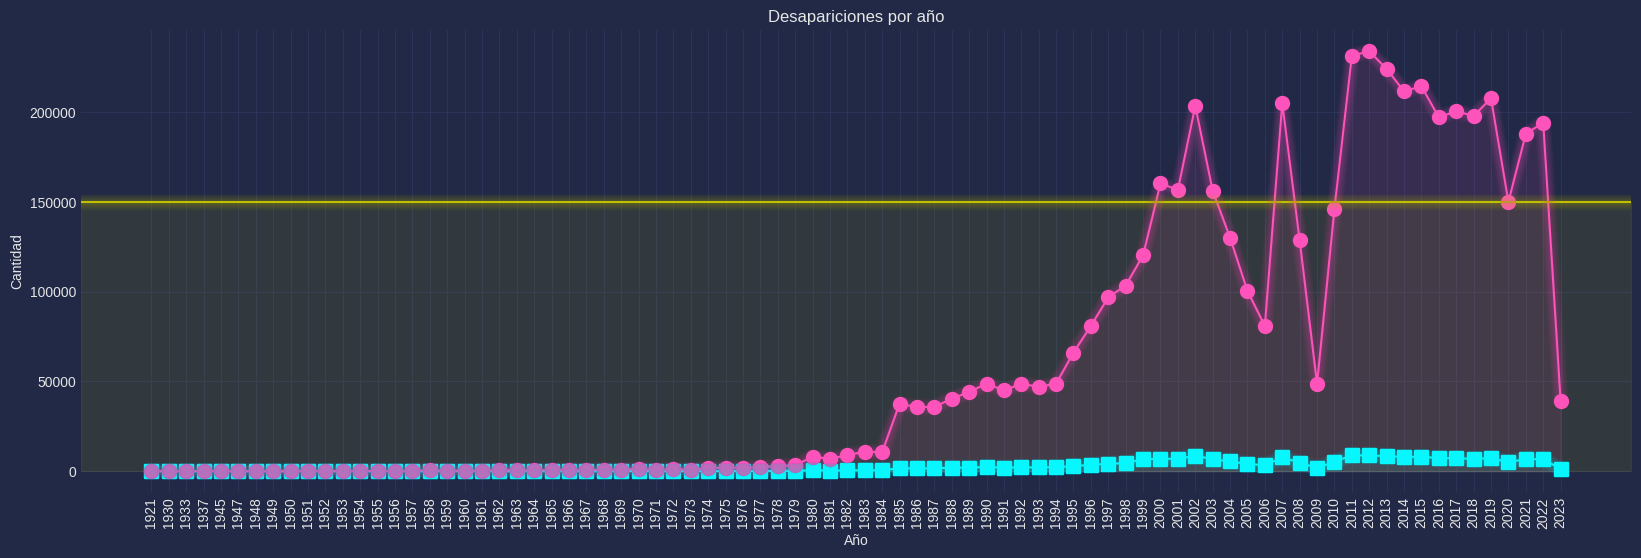

In [27]:
f=data.groupby(['año'])['ID'].count()
g=data.groupby(['año'])['Edad al momento de la desaparición'].sum()
plt.figure(figsize=(20,6))
plt.plot(f.index, f.values,marker='s',ms=10 )
plt.plot(g.index, g.values,marker='o',ms=10 )
plt.title('Desapariciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
#plt.ylim(0,11000)
plt.xticks(rotation='vertical')
plt.legend('Cuenta','Edades')
plt.axhline(y=150000, c='y')
mplcyberpunk.add_glow_effects()

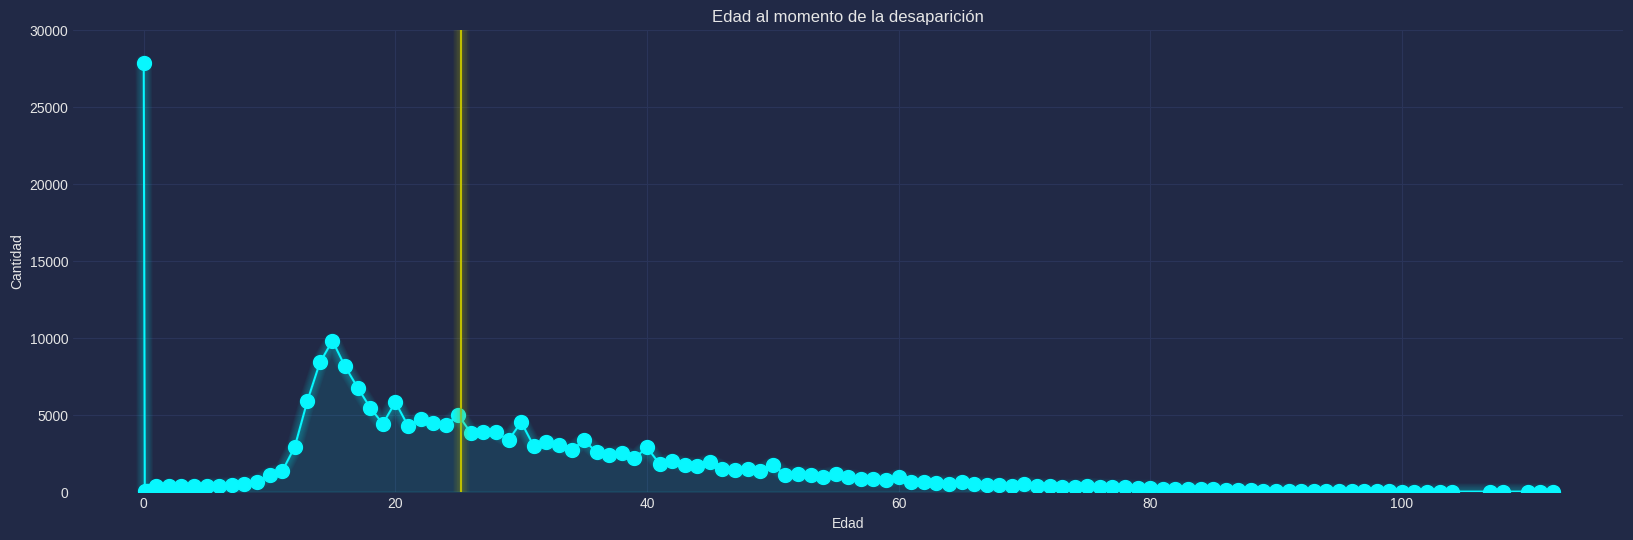

In [28]:
g=data.groupby(['Edad al momento de la desaparición'])['ID'].count()
plt.figure(figsize=(20,6))
plt.plot(g.index, g.values,marker='o',ms=10)
plt.ylim(0,30000)
plt.title('Edad al momento de la desaparición')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.axvline(25.23,c='y')
mplcyberpunk.add_glow_effects()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa241d03f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa241d38490>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fa241d03b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa241d389d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa241d38c70>],
 'means': []}

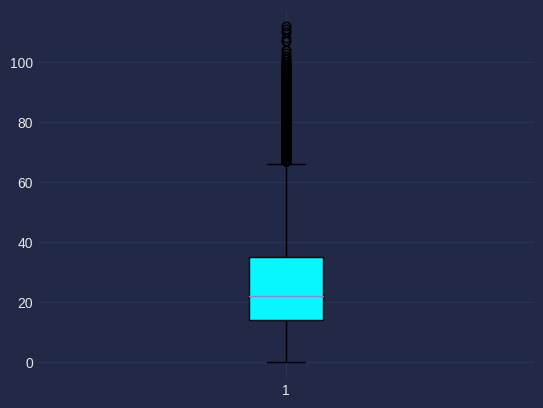

In [29]:
plt.boxplot(x=data['Edad al momento de la desaparición'],patch_artist=True)

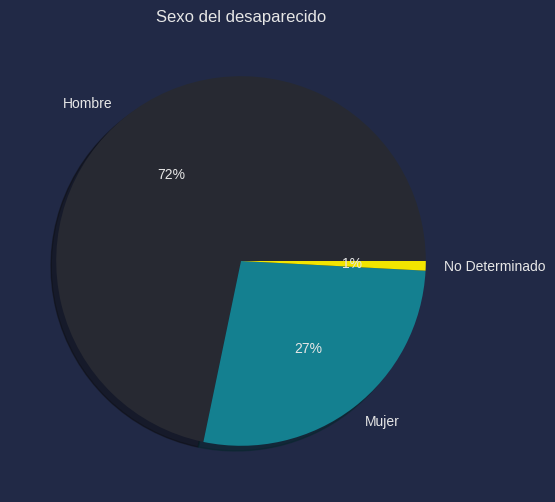

In [30]:
s=data.groupby(data['Sexo del desaparecido'])['ID'].count()
colors=['#272932','#148090','#f3e500']
plt.figure(figsize=(6,6))
plt.pie(x=s.values,labels=s.index, autopct='%1.f%%', colors=colors,shadow=True)
plt.title('Sexo del desaparecido')
mplcyberpunk.add_glow_effects()

In [31]:
url = 'https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json'
col_geo = requests.get(url)

figure = px.choropleth(data_frame=data,
                       geojson=url,
                       locations='Departamento donde ocurre la desaparición DANE',
                       featureidkey='properties.NOMBRE_DPT',
                       color='cuenta',
                       color_continuous_scale="turbo",
                       labels={'cuenta':'Desaparecidos'} )

figure.update_geos(showcountries=False, showcoastlines=False, showland=True, fitbounds="locations")

figure.update_layout(title_text = 'Desaparecidos por Departamento (1921-2022)')

figure.show()

In [38]:
px.sunburst(data,path=["Estado civil del desaparecido","Sexo del desaparecido"])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197436 entries, 0 to 197435
Data columns (total 19 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   ID                                              197436 non-null  int64         
 1   Estado de la desaparición                       197436 non-null  object        
 2   Clasificación de la desaparición                197436 non-null  object        
 3   Fecha de la desaparición                        197335 non-null  datetime64[ns]
 4   Edad al momento de la desaparición              197436 non-null  float64       
 5   Sexo del desaparecido                           197436 non-null  object        
 6   País de nacimiento del desaparecido             197436 non-null  object        
 7   Ancestro racial del desaparecido                197436 non-null  object        
 8   Estado civil del desaparecido     